<a href="https://colab.research.google.com/github/PRSAHANTH666/PANDAS/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [71]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [72]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [73]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [74]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [75]:
df.corr() #Below values show that there is strong correlation between features and targe variables.

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


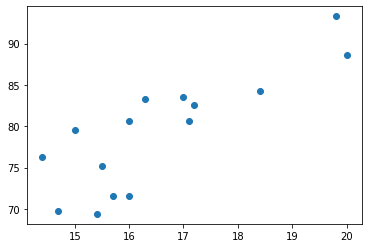

In [76]:
x=[20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
    15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,14.4]
y=[88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
  71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,76.3]
plt.scatter(x,y)
plt.show()

In [77]:
df.dtypes


Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [78]:
from sklearn.model_selection import train_test_split
X=df['Chirps/Second']
y=df['Ground Temperature']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [79]:
y_test

7     71.6
12    80.6
11    82.6
1     71.6
5     75.2
Name: Ground Temperature, dtype: float64

In [80]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train.array.reshape(-1, 1),y_train.array.reshape(-1, 1))

LinearRegression()

In [81]:
print(regressor.intercept_)

[27.35576979]


In [82]:
print(regressor.coef_)

[[3.18288104]]


In [83]:
#extraplation
regressor.predict([[22.73]])   # at temperature 95 there will be 22.73 chrips/second

array([[99.70265573]])

In [84]:
#intrapolation
#above given dataset show that at temperature 84.2 there will be 18.4 chrips/second

In [85]:
from numpy.core.fromnumeric import reshape
y_pred=regressor.predict(x_test.array.reshape(-1,1))
y_pred

array([[77.32700205],
       [78.28186636],
       [82.1013236 ],
       [78.28186636],
       [76.69042584]])

In [86]:
from sklearn import metrics
print('r2-score:',metrics.r2_score(y_test,y_pred))   #r2score is 0.66 hence the model is good as this evaluation metric has a basevalue of 0 ,if the metric show value below zero then it is useless model

r2-score: 0.17648615915630372


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [87]:
db = pd.read_fwf("brain_body.txt")
db

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [88]:
db.isnull().sum()

Brain    0
Body     0
dtype: int64

In [89]:
db.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [90]:
db.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [91]:
IQR = db['Brain'].quantile(0.75)-db['Brain'].quantile(0.25)
lower_threshold = db['Brain'].quantile(0.25) - (1.5*IQR)
higher_threshold = db['Brain'].quantile(0.75) + (1.5*IQR)
lower_threshold , higher_threshold


(-70.80375000000001, 119.60625)

In [92]:
# outlier treating for brain column
db['Brain'] = db['Brain'].clip(-70.80375000000001, 119.60625)

In [93]:
iqr = db['Body'].quantile(0.75) - db['Body'].quantile(0.25)
Lower_threshold = db['Body'].quantile(0.25) - (1.5*iqr)
Higher_threshold = db['Body'].quantile(0.75) + (1.5*iqr)
Lower_threshold , Higher_threshold

(-238.375, 408.625)

In [94]:
# outlier treating for body column
db['Body'] = db['Body'].clip(-238.375, 408.625)

In [95]:
db.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,104.676532
std,45.213842,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,408.625000


In [96]:
db.corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


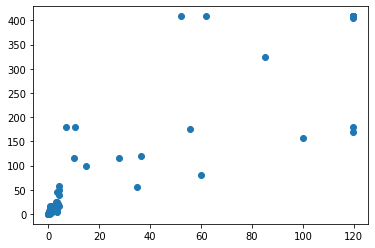

In [97]:
x=db['Brain']
y=db['Body']
plt.scatter(x,y)
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
X=db['Brain']
Y=db['Body']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [99]:
x_test,y_test

(36      4.05000
 55    119.60625
 10      0.10100
 45     52.16000
 60      0.10400
 22      0.78500
 26      1.41000
 19      0.02300
 13      0.00500
 61      4.23500
 47      0.55000
 52      0.07500
 20    119.60625
 46     10.55000
 35     35.00000
 21    119.60625
 32    119.60625
 34      6.80000
 24      3.30000
 Name: Brain, dtype: float64, 36     17.000
 55    180.000
 10      4.000
 45    408.625
 60      2.500
 22      3.500
 26     17.500
 19      0.300
 13      0.140
 61     50.400
 47      2.400
 52      1.200
 20    408.625
 46    179.500
 35     56.000
 21    408.625
 32    408.625
 34    179.000
 24     25.600
 Name: Body, dtype: float64)

In [100]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train.array.reshape(-1, 1),y_train.array.reshape(-1, 1))

LinearRegression()

In [101]:
print(reg.intercept_), print(reg.coef_)

[13.02874051]
[[2.95217282]]


(None, None)

In [102]:
y_predic=reg.predict(x_test.array.reshape(-1,1))
y_predic

array([[ 24.98504042],
       [366.12706061],
       [ 13.32690996],
       [167.01407469],
       [ 13.33576648],
       [ 15.34619617],
       [ 17.19130418],
       [ 13.09664048],
       [ 13.04350137],
       [ 25.53119239],
       [ 14.65243556],
       [ 13.25015347],
       [366.12706061],
       [ 44.17416374],
       [116.35478913],
       [366.12706061],
       [366.12706061],
       [ 33.10351567],
       [ 22.77091081]])

In [103]:
from sklearn import metrics
print('r2-score:',metrics.r2_score(y_test,y_predic))

r2-score: 0.7013716763314775


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [104]:
dv = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
dv

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [105]:
dv.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [106]:
import seaborn as sns

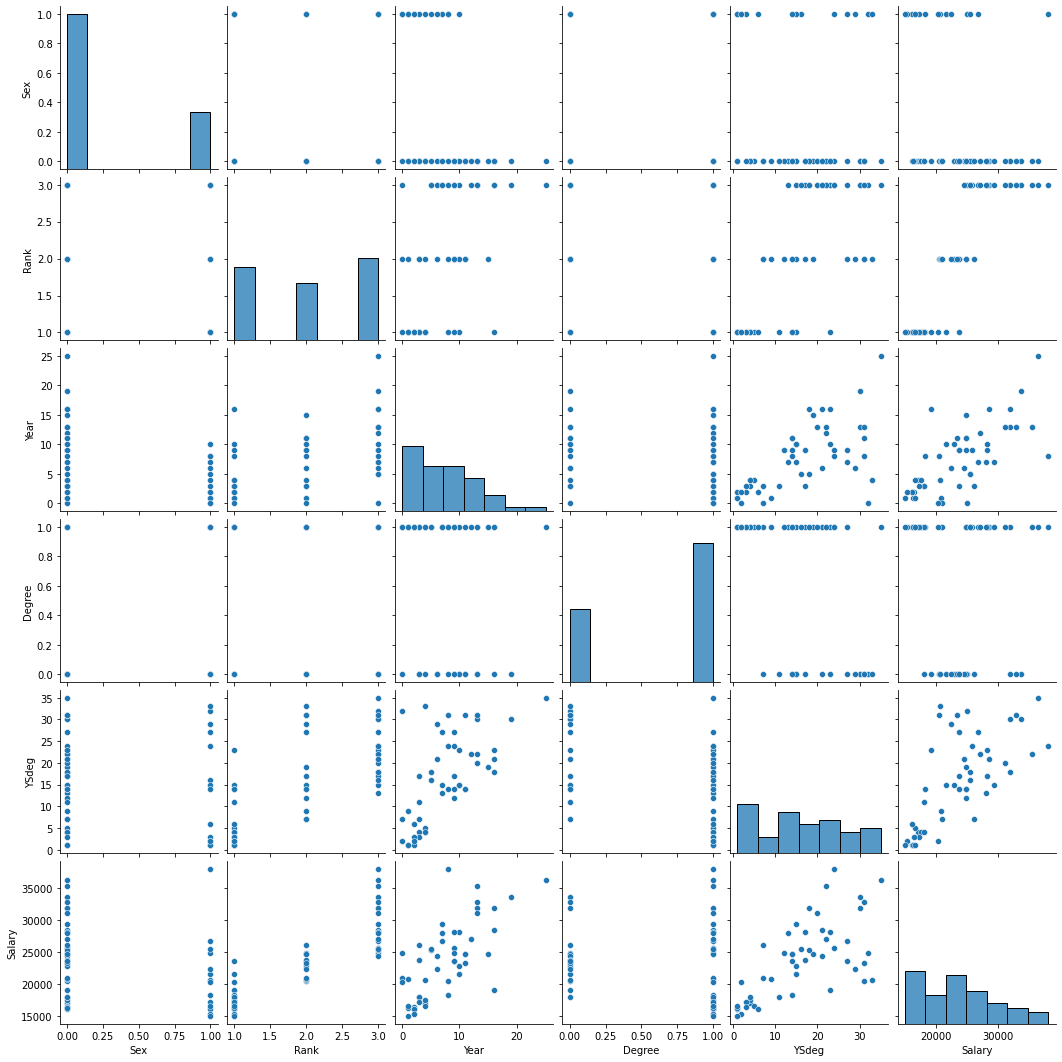

In [107]:
sns.pairplot(dv)

In [108]:
dv.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [109]:
# as above correlation show that there is a linear relation between salary and sex,rank,year,ysdeg and no relation bwt salary and degree.


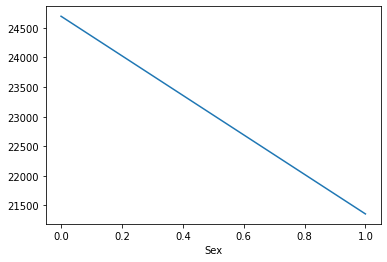

In [125]:
dv.groupby('Sex')['Salary'].mean().plot()
plt.show()

In [ ]:
#above graph show that there is a relation bwt sex and salary ,as the above gaph shows negative correlation bwt variables.
# yes sex is a factor in salary

In [110]:
dv = dv.drop(['Degree'],axis=1)


In [111]:
dv

,Sex,Rank,Year,YSdeg,Salary
0,0,3,25,35,36350
1,0,3,13,22,35350
2,0,3,10,23,28200
3,1,3,7,27,26775
4,0,3,19,30,33696
5,0,3,16,21,28516
6,1,3,0,32,24900
7,0,3,16,18,31909
8,0,3,13,30,31850
9,0,3,13,31,32850


In [115]:
from sklearn.model_selection import train_test_split
n=dv[['Sex', 'Rank', 'Year', 'YSdeg']].values
p=dv['Salary'].values

x_train,x_test,y_train,y_test = train_test_split(n,p,test_size=0.3)

In [118]:
x_test, y_test

(array([[ 0,  3, 16, 21],
        [ 0,  2,  3,  7],
        [ 0,  3, 13, 20],
        [ 0,  3,  6, 21],
        [ 0,  3,  7, 15],
        [ 0,  2, 11, 31],
        [ 0,  1,  1,  1],
        [ 0,  3, 16, 18],
        [ 1,  1,  1,  1],
        [ 0,  3, 13, 22],
        [ 0,  3,  9, 24],
        [ 0,  2, 15, 19],
        [ 1,  2,  4, 33],
        [ 1,  1,  8, 14],
        [ 0,  1,  3,  4],
        [ 0,  2, 10, 15]]),
 array([28516, 26182, 31114, 24450, 29342, 23300, 16244, 31909, 15000,
        35350, 25748, 24750, 20690, 18304, 18075, 22906]))

In [116]:
from sklearn.linear_model import LinearRegression
regres = LinearRegression()
regres.fit(x_train,y_train)

LinearRegression()

In [123]:
o_predt = regres.predict(x_test)
o_predt , y_test

(array([32117.28421883, 21616.52830735, 30748.13422456, 27453.91146659,
        28099.41973023, 24630.54255545, 16006.5877721 , 32206.86971304,
        17297.16041305, 30688.41056175, 28763.33779805, 26854.23363319,
        22597.03060702, 20173.31753137, 16849.67682834, 24641.99458269]),
 array([28516, 26182, 31114, 24450, 29342, 23300, 16244, 31909, 15000,
        35350, 25748, 24750, 20690, 18304, 18075, 22906]))

In [124]:
from sklearn import metrics
print('r2-score:',metrics.r2_score(y_test,o_predt))

r2-score: 0.8092649632656054
